<a href="https://colab.research.google.com/github/OswaldGutierrez/Modelos-IA-2025-1/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="6">ENTREGA 2. PROYECTO IA 2025-1</font>

**OSWALD DAVID GUTIÉRREZ CORTINA**

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import local.lib.mlutils
%matplotlib inline

In [3]:
!wget https://raw.githubusercontent.com/OswaldGutierrez/contenidoTrain/main/train.zip
!unzip train.zip
d = pd.read_csv("train.csv")

--2025-05-26 01:02:35--  https://raw.githubusercontent.com/OswaldGutierrez/contenidoTrain/main/train.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19235312 (18M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>]  18.34M  --.-KB/s    in 0.1s    

2025-05-26 01:02:36 (153 MB/s) - ‘train.zip’ saved [19235312/19235312]

Archive:  train.zip
  inflating: train.csv               


<font size="5">**1. DIMENSIONES DEL DATAFRAME**</font>


In [4]:
d = pd.read_csv("train.csv")
print (d.shape)

(692500, 21)


<font size="5">**2. PRIMERAS FILAS DEL DATASET**</font>

In [5]:
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


<font size="5">**3. TIPOS DE DATOS**</font>

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

<font size="5">**4. DATOS FALTANTES**</font>

In [7]:
d.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_TIENELAVADORA,39773


<font size="5">**5. VARIABLES CATEGÓRICAS**</font>

In [8]:
varsCategoricas = [i for i in d.columns if not i in d._get_numeric_data()]
tamaño = len(varsCategoricas)
for indice in range(tamaño):
  print(varsCategoricas[indice])

ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
ESTU_PRIVADO_LIBERTAD
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_TIENEINTERNET.1
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL


In [9]:
for indice in varsCategoricas:
  print(np.unique(d[indice].dropna()))

['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GESTISN HUMANA'
 'ADMINIS

<font size="5">**6. ANÁLISIS SOBRE LAS DISTRIBUCIONES DE COLUMNAS**</font>

In [10]:
renGlobal = "RENDIMIENTO_GLOBAL"
d[renGlobal].value_counts()

,count
RENDIMIENTO_GLOBAL,
alto,175619
bajo,172987
medio-bajo,172275
medio-alto,171619


In [11]:
famEstrato = "FAMI_ESTRATOVIVIENDA"
d[famEstrato].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [12]:
periodo = "PERIODO"
d[periodo].nunique()

9

In [13]:
ESPRDP = "ESTU_PRGM_DEPARTAMENTO"
d[ESPRDP].nunique()

31

<font size="5">**7. GRÁFICOS**</font>

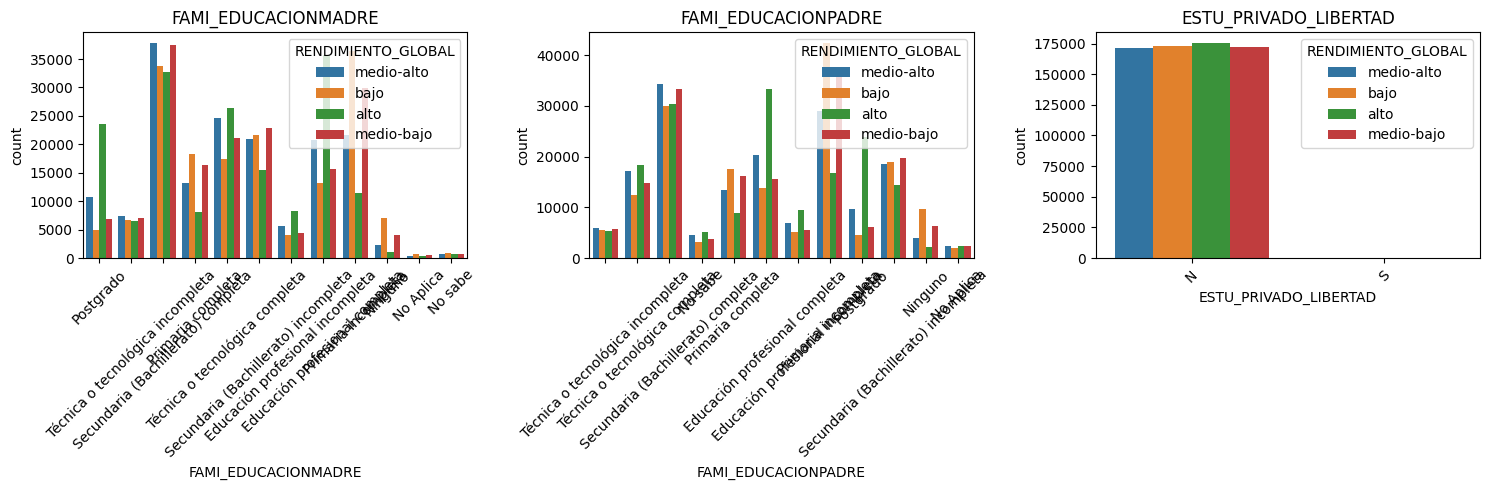

In [14]:
variables = ["FAMI_EDUCACIONMADRE","FAMI_EDUCACIONPADRE","ESTU_PRIVADO_LIBERTAD"]

plt.figure(figsize=(15, 5))

for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=d)
    plt.title(c)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

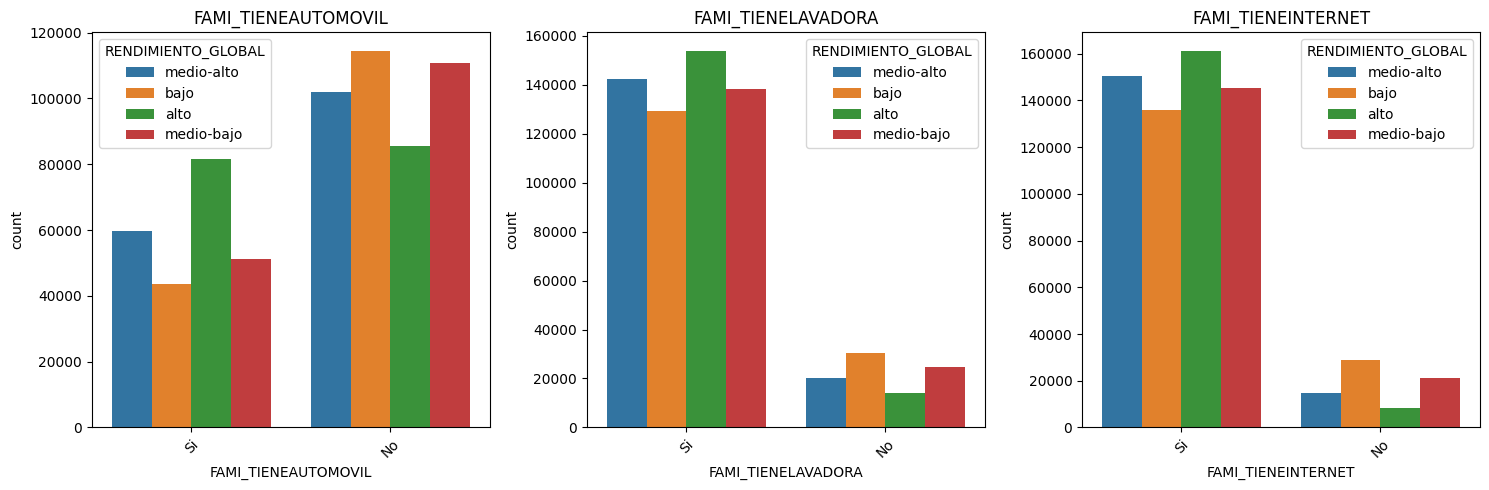

In [15]:
variables = ["FAMI_TIENEAUTOMOVIL","FAMI_TIENELAVADORA","FAMI_TIENEINTERNET"]

plt.figure(figsize=(15, 5))

for i, c in enumerate(variables):
    plt.subplot(1, len(variables), i + 1)
    sns.countplot(x=c, hue="RENDIMIENTO_GLOBAL", data=d)
    plt.title(c)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<font size="5">**8. ANÁLISIS**</font>

En el análisis del archivo realizaremos algunas operaciones sobre limpieza de datos y haremos algunos preprocesados de datos que consideremos necesarios.

La primera operación que haré será rellenar los datos faltantes con los valores que más estén en la misma.

In [16]:
#Creamos una copia del dataframe para trabajar sobre la copia. Además, verificamos que tengan las mismas dimensiones.
copiaDf = d.copy()
print(d.shape)
print(copiaDf.shape)

(692500, 21)
(692500, 21)


In [17]:
# Para las Variables Categóricas:
varsCategoricas = [i for i in copiaDf.columns if not i in copiaDf._get_numeric_data()]
tamaño = len(varsCategoricas)
for indice in range(tamaño):
  print(varsCategoricas[indice])

ESTU_PRGM_ACADEMICO
ESTU_PRGM_DEPARTAMENTO
ESTU_VALORMATRICULAUNIVERSIDAD
ESTU_HORASSEMANATRABAJA
FAMI_ESTRATOVIVIENDA
FAMI_TIENEINTERNET
FAMI_EDUCACIONPADRE
FAMI_TIENELAVADORA
FAMI_TIENEAUTOMOVIL
ESTU_PRIVADO_LIBERTAD
ESTU_PAGOMATRICULAPROPIO
FAMI_TIENECOMPUTADOR
FAMI_TIENEINTERNET.1
FAMI_EDUCACIONMADRE
RENDIMIENTO_GLOBAL


In [18]:
# Ahora, buscamos los valores más repetidos
valorObjetivo = copiaDf[varsCategoricas].mode().iloc[0]
valorObjetivo

,0
ESTU_PRGM_ACADEMICO,DERECHO
ESTU_PRGM_DEPARTAMENTO,BOGOTÁ
ESTU_VALORMATRICULAUNIVERSIDAD,Entre 1 millón y menos de 2.5 millones
ESTU_HORASSEMANATRABAJA,Más de 30 horas
FAMI_ESTRATOVIVIENDA,Estrato 2
FAMI_TIENEINTERNET,Si
FAMI_EDUCACIONPADRE,Secundaria (Bachillerato) completa
FAMI_TIENELAVADORA,Si
FAMI_TIENEAUTOMOVIL,No
ESTU_PRIVADO_LIBERTAD,N


In [19]:
# Ya que encontramos los valores objetivos (los más repetidos de cada columna), lo siguiente es rellenar los datos faltantes con dichos valores
for column in varsCategoricas:
  copiaDf[column].fillna(valorObjetivo[column], inplace=True)

<ipython-input-19-9776ca698fd7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  copiaDf[column].fillna(valorObjetivo[column], inplace=True)


In [20]:
# Por último, verificamos que no hayan datos faltantes como hicimos en el punto 4.
copiaDf.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,0
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,0
FAMI_EDUCACIONPADRE,0
FAMI_TIENELAVADORA,0


<font size="5">**9. NORMALIZAR VALORES DE RANGO**</font>

La columna objetivo para hacer la normalización de valores de rango será: **ESTU_HORASSEMANATRABAJA**.

**0** = 0 horas

**1** = Menos de 10 horas

**2** = Entre 11 y 20 horas

**3** = Entre 21 y 30 horas

**4** = Más de 30 horas


In [22]:
copiaDf['ESTU_HORASSEMANATRABAJA'].replace(['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],[0,1,2,3,4],inplace=True)

<ipython-input-22-ebaeedd778a5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copiaDf['ESTU_HORASSEMANATRABAJA'].replace(['0','Menos de 10 horas','Entre 11 y 20 horas','Entre 21 y 30 horas','Más de 30 horas'],[0,1,2,3,4],inplace=True)


Ahora, normalizaremos los valores de la columna **FAMI_ESTRATOVIVIENDA**, de la siguiente manera:

**0** = Sin estrato

**1** = Estrato 1

**2** = Estrato 2

**3** = Estrato 3

**4** = Estrato 4

**5** = Estrato 5

**6** = Estrato 6

In [23]:
copiaDf['FAMI_ESTRATOVIVIENDA'].replace(['Sin Estrato','Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6' ],[0,1,2,3,4,5,6],inplace=True)

<ipython-input-23-b63aa0333379>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copiaDf['FAMI_ESTRATOVIVIENDA'].replace(['Sin Estrato','Estrato 1','Estrato 2','Estrato 3','Estrato 4','Estrato 5','Estrato 6' ],[0,1,2,3,4,5,6],inplace=True)


Vamos a hacer una normalización a varias columnas en conjunto, las cuales son:
* FAMI_TIENELAVADORA
* FAMI_TIENEINTERNET
* FAMI_TIENEAUTOMOVIL
* FAMI_TIENECOMPUTADOR

**0** = No

**1** = Si

In [24]:
copiaDf['FAMI_TIENELAVADORA'] = copiaDf['FAMI_TIENELAVADORA'].replace({'No': 0, 'Si': 1})
copiaDf['FAMI_TIENEINTERNET'] = copiaDf['FAMI_TIENEINTERNET'].replace({'No': 0, 'Si': 1})
copiaDf['FAMI_TIENEAUTOMOVIL'] = copiaDf['FAMI_TIENEAUTOMOVIL'].replace({'No': 0, 'Si': 1})
copiaDf['FAMI_TIENECOMPUTADOR'] = copiaDf['FAMI_TIENECOMPUTADOR'].replace({'No': 0, 'Si': 1})

<ipython-input-24-db3ac2916ee2>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copiaDf['FAMI_TIENELAVADORA'] = copiaDf['FAMI_TIENELAVADORA'].replace({'No': 0, 'Si': 1})
<ipython-input-24-db3ac2916ee2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  copiaDf['FAMI_TIENEINTERNET'] = copiaDf['FAMI_TIENEINTERNET'].replace({'No': 0, 'Si': 1})
<ipython-input-24-db3ac2916ee2>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.inf

<font size="5">**10. CONVERTIR COLUMNAS A ONE-HOT**</font>


Vamos a representar una variable categórica en datos numéricos para su análisis. Recordemos que nuestras variables categóricas son:
* STU_PRGM_ACADEMICO
* ESTU_PRGM_DEPARTAMENTO
* ESTU_VALORMATRICULAUNIVERSIDAD
* ESTU_HORASSEMANATRABAJA
* FAMI_ESTRATOVIVIENDA
* FAMI_TIENEINTERNET
* FAMI_EDUCACIONPADRE
* FAMI_TIENELAVADORA
* FAMI_TIENEAUTOMOVIL
* ESTU_PRIVADO_LIBERTAD
* ESTU_PAGOMATRICULAPROPIO
* FAMI_TIENECOMPUTADOR
* FAMI_EDUCACIONMADRE
* RENDIMIENTO_GLOBAL

In [36]:
copiaDf.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,1,3,1,Técnica o tecnológica incompleta,1,...,N,No,1,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,3,0,Técnica o tecnológica completa,1,...,N,No,1,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,4,3,1,Secundaria (Bachillerato) completa,1,...,N,No,0,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,4,1,No sabe,1,...,N,No,1,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,3,3,1,Primaria completa,1,...,N,No,1,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


In [25]:
dCodificado = pd.get_dummies(copiaDf, columns=varsCategoricas)
dCodificado = dCodificado.astype(int)
dCodificado

,ID,PERIODO,coef_1,coef_2,coef_3,coef_4,ESTU_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,ESTU_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,ESTU_PRGM_ACADEMICO_ACUICULTURA,ESTU_PRGM_ACADEMICO_ADMINISTRACION,...,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,RENDIMIENTO_GLOBAL_alto,RENDIMIENTO_GLOBAL_bajo,RENDIMIENTO_GLOBAL_medio-alto,RENDIMIENTO_GLOBAL_medio-bajo
0,904256,20212,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,645256,20212,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,308367,20203,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,470353,20195,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,989032,20212,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
692496,754213,20212,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
692497,504185,20183,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
692498,986620,20195,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [26]:
# Corroboramos todos los valores de nuestra columnas objetivos. Esto con el fin de hacer la normalización y no pasar por alto algún valor.
print(d["ESTU_HORASSEMANATRABAJA"].unique())
print(d["FAMI_ESTRATOVIVIENDA"].unique())
print(d["FAMI_TIENELAVADORA"].unique())
print(d["FAMI_TIENEINTERNET"].unique())
print(d["FAMI_TIENEAUTOMOVIL"].unique())
print(d["FAMI_TIENECOMPUTADOR"].unique())

# Hacemos la comparación en el dataframe de respaldo al cual le remplazamos los valores faltantes.
print("--------------------------------------")
print(copiaDf["ESTU_HORASSEMANATRABAJA"].unique())
print(copiaDf["FAMI_ESTRATOVIVIENDA"].unique())
print(copiaDf["FAMI_TIENELAVADORA"].unique())
print(copiaDf["FAMI_TIENEINTERNET"].unique())
print(copiaDf["FAMI_TIENEAUTOMOVIL"].unique())
print(copiaDf["FAMI_TIENECOMPUTADOR"].unique())

['Menos de 10 horas' '0' 'Más de 30 horas' 'Entre 21 y 30 horas'
 'Entre 11 y 20 horas' nan]
['Estrato 3' 'Estrato 4' 'Estrato 5' 'Estrato 2' 'Estrato 1' nan
 'Estrato 6' 'Sin Estrato']
['Si' 'No' nan]
['Si' 'No' nan]
['Si' 'No' nan]
['Si' 'No' nan]
--------------------------------------
[1 0 4 3 2]
[3 4 5 2 1 6 0]
[1 0]
[1 0]
[1 0]
[1 0]
